check my batch ssies3_ssm_v_b draw

In [32]:
import os
from datetime import datetime

from netCDF4 import Dataset
import spacepy.pycdf
import h5py
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re

import libs_cleo

plt.rcParams['figure.figsize'] = [20, 5]  # 设置图形的默认尺寸为20x5英寸

In [33]:
ssies3_fp = r"G:\0_postgraduate\DMSP\data\2014\f16\ssies3\dmsp-f16_ssies-3_thermal-plasma_201401010137_v01.cdf"
ssm_fp = r"G:\0_postgraduate\DMSP\data\2014\f16\ssm\dmsp-f16_ssm_magnetometer_20140101_v1.0.4.cdf"
ssies3 = libs_cleo.CDFFile(ssies3_fp)
ssm = libs_cleo.CDFFile(ssm_fp)
data_ssies3 = ssies3.ssies3_data()
data_ssm = ssm.ssm_data()

In [34]:
vx_set_nan = ssies3.vx_set_nan()
vy_set_nan = ssies3.v_yz_set_nan('vy')
vz_set_nan = ssies3.v_yz_set_nan('vz')

In [35]:
# ssm clip
st = data_ssies3['timestamps'].iloc[0]
et = data_ssies3['timestamps'].iloc[-1]
s_idx = np.where(data_ssm['timestamps']==st)
e_idx = np.where(data_ssm['timestamps']==et)
data_ssm_clip = data_ssm.iloc[s_idx[0][0]:e_idx[0][0] + 1].reset_index(drop=True)

In [36]:
def draw(x,y):
    fig,ax = plt.subplots()
    plt.plot(x,y)
    ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,15,30,45]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.axhline(y=0, color='red', linestyle='--', label='y = 0')
    return fig

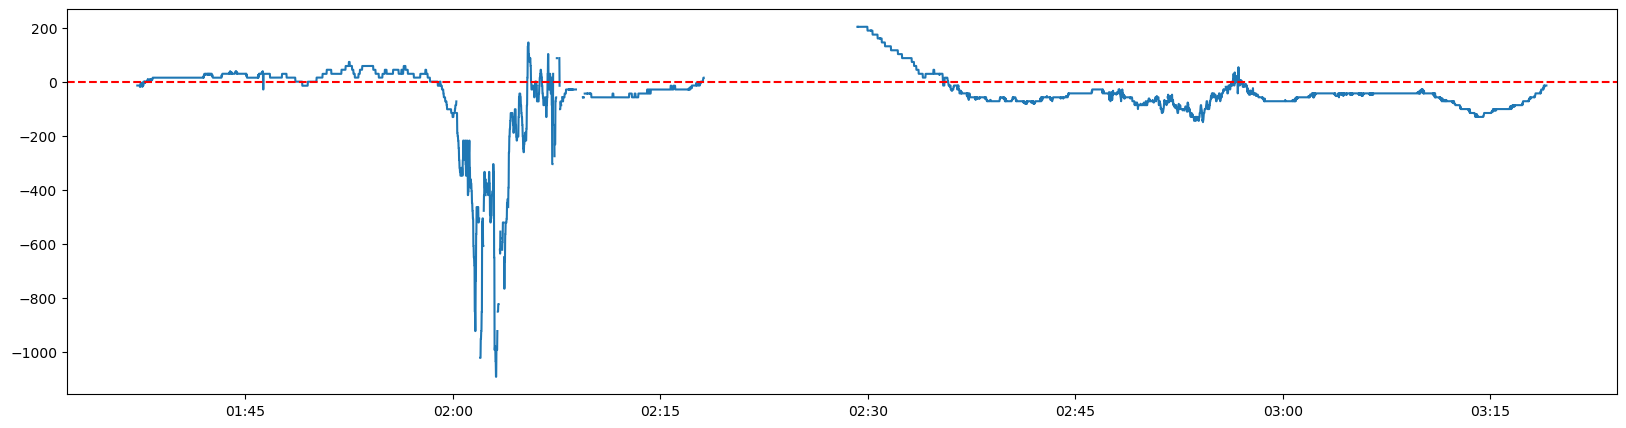

In [37]:
# x v
x = vz_set_nan['Epoch']
y = -vz_set_nan['vz']
fig = draw(x,y)

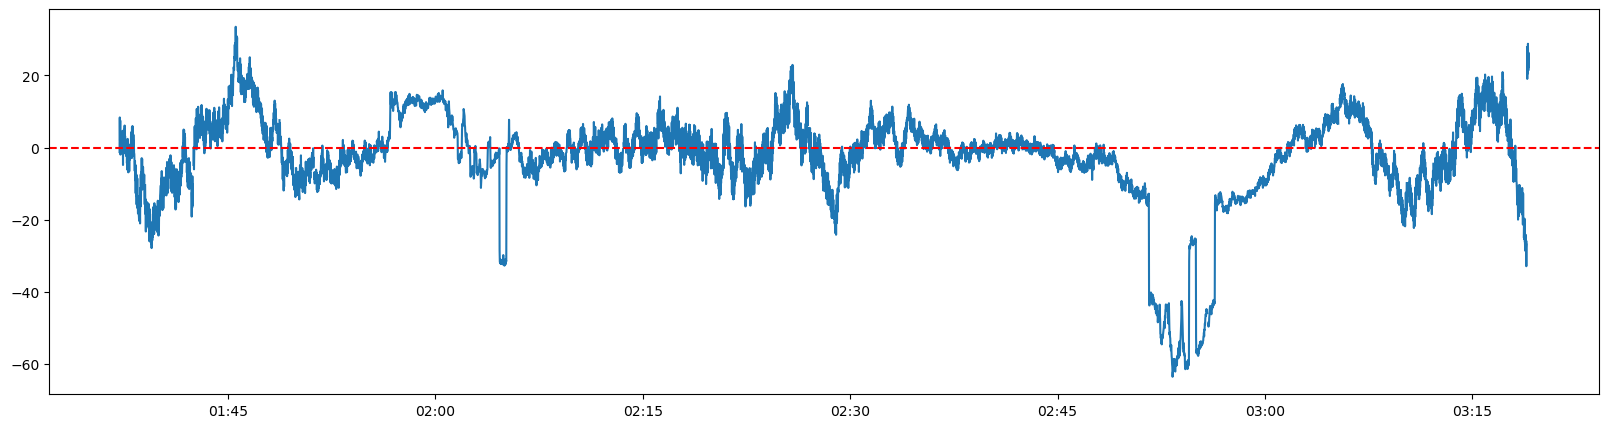

In [38]:
# x delta_b
x = data_ssm_clip['Epoch']
y = data_ssm_clip['DELTA_B_SC_x']
fig = draw(x,y)

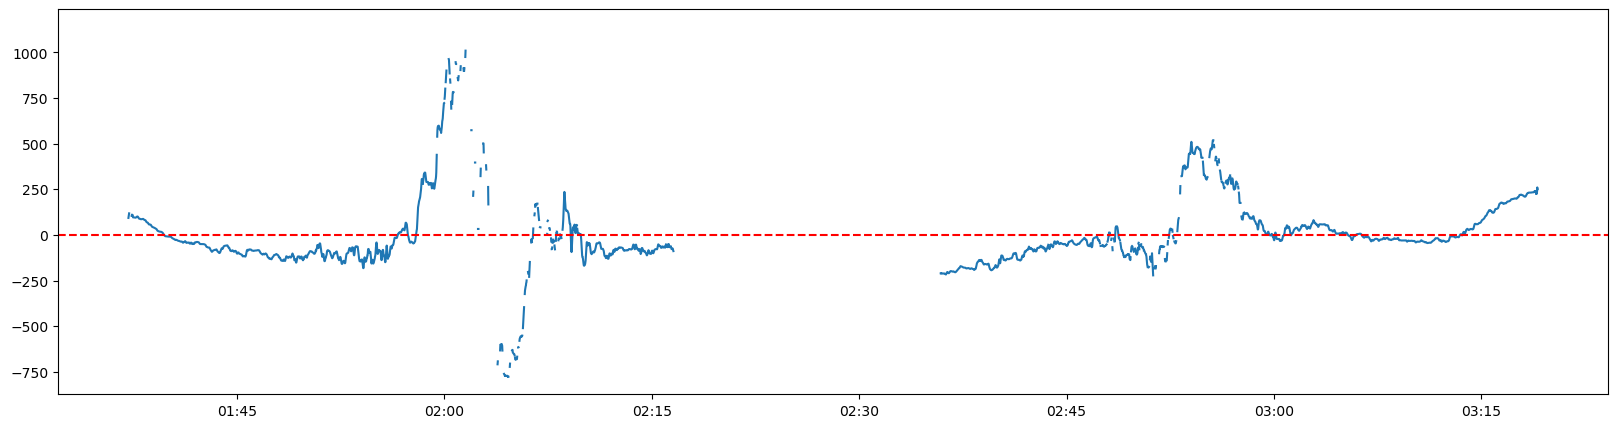

In [39]:
# y v
x = vx_set_nan['Epoch']
y = vx_set_nan['vx']
fig = draw(x,y)

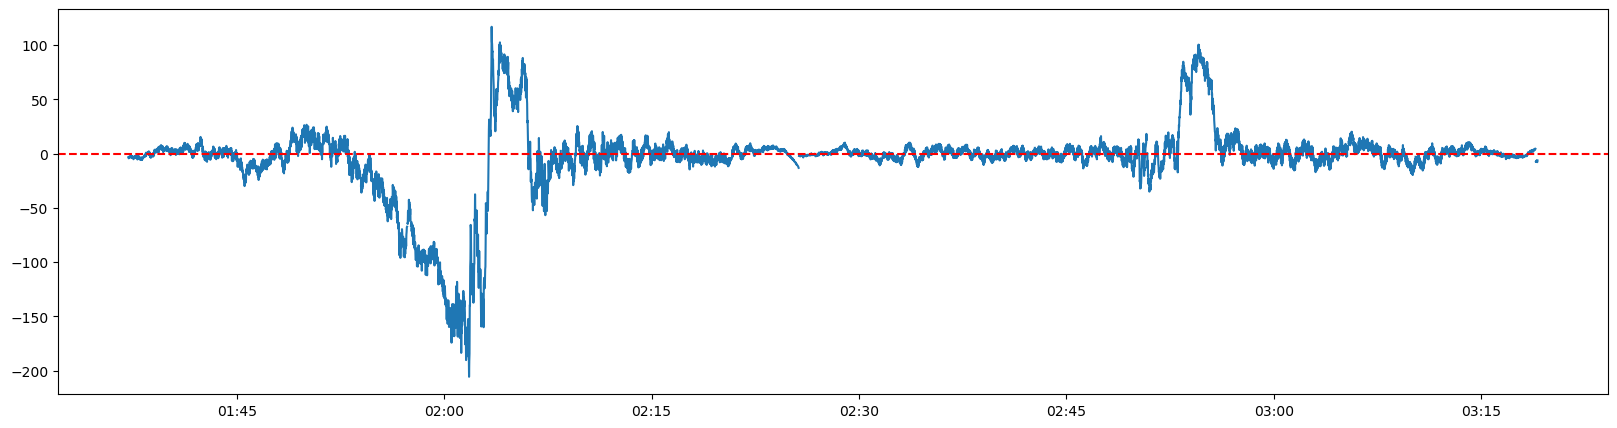

In [40]:
# y delta_b
x = data_ssm_clip['Epoch']
y = data_ssm_clip['DELTA_B_SC_y']
fig = draw(x,y)

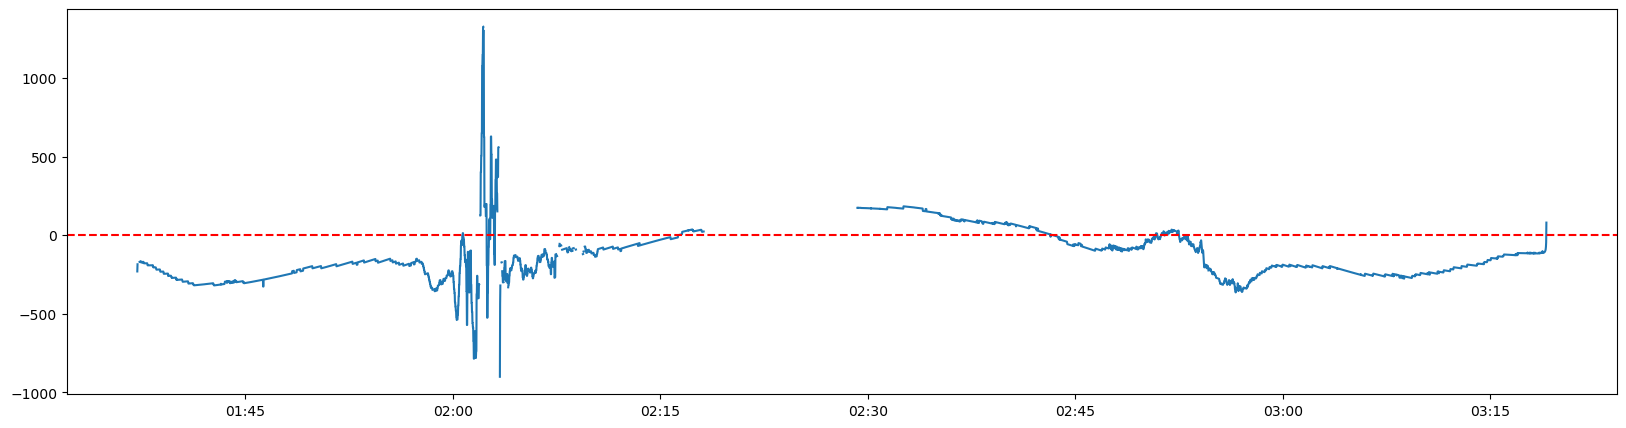

In [41]:
# z v
x = vy_set_nan['Epoch']
y = -vy_set_nan['vy']
fig = draw(x,y)

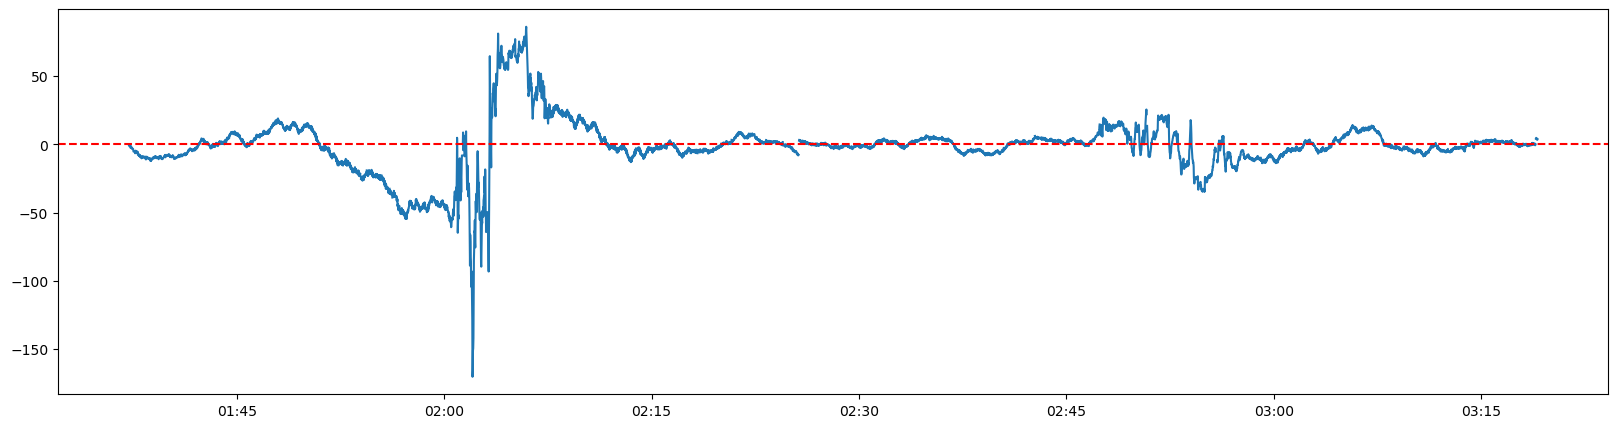

In [42]:
# z delta_b
x = data_ssm_clip['Epoch']
y = data_ssm_clip['DELTA_B_SC_z']
fig = draw(x,y)